In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import functions as f
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration yaml file not found!")

In [3]:
config['data']['raw']

'../data/raw/WMT_Grocery_202209.csv'

In [4]:
# load the walmart dataset 
walmart_df = pd.read_csv(config['data']['raw'], low_memory=False)
#walmart_df = pd.read_csv(r"../data/raw/WMT_Grocery_202209.csv",low_memory=False)
walmart_df

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568529,568529,70072,Alcohol,Wine,White Wine,Alcohol/Wine,593600139,https://www.walmart.com/ip/Farm-Fresh-Blueberr...,Farm Fresh Blueberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732333
568530,568530,70072,Alcohol,Wine,White Wine,Alcohol/Wine,333403243,https://www.walmart.com/ip/Farm-Fresh-Peach-Mo...,Farm Fresh Peach Moscato 750 Ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732334
568531,568531,70072,Alcohol,Wine,White Wine,Alcohol/Wine,526588325,https://www.walmart.com/ip/Farm-Fresh-Raspberr...,Farm Fresh Raspberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732335
568532,568532,70072,Alcohol,Wine,White Wine,Alcohol/Wine,286992782,https://www.walmart.com/ip/Farm-Fresh-Mango-Mo...,Farm Fresh Mango Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732336


In [5]:
f.print_in_red("Informations about DataFrame")
walmart_df.info()

Informations about DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              568534 non-null  int64  
 1   SHIPPING_LOCATION  568534 non-null  int64  
 2   DEPARTMENT         568534 non-null  object 
 3   CATEGORY           568534 non-null  object 
 4   SUBCATEGORY        361324 non-null  object 
 5   BREADCRUMBS        568534 non-null  object 
 6   SKU                568534 non-null  int64  
 7   PRODUCT_URL        568534 non-null  object 
 8   PRODUCT_NAME       568534 non-null  object 
 9   BRAND              568507 non-null  object 
 10  PRICE_RETAIL       568534 non-null  float64
 11  PRICE_CURRENT      568534 non-null  float64
 12  PRODUCT_SIZE       505709 non-null  object 
 13  PROMOTION          0 non-null       float64
 14  RunDate            568534 non-null  object 
 15  tid                568

In [6]:
f.print_in_red("Shape of DataFrame")
print(f"rows: {walmart_df.shape[0]}\ncolumns: {walmart_df.shape[1]}")

Shape of DataFrame
rows: 568534
columns: 16


In [7]:
f.print_in_red("Cleaning the columns names:")
f.clean_column_names(walmart_df)
print(walmart_df.columns)

Cleaning the columns names:
Index(['index', 'shipping_location', 'department', 'category', 'subcategory',
       'breadcrumbs', 'sku', 'product_url', 'product_name', 'brand',
       'price_retail', 'price_current', 'product_size', 'promotion', 'rundate',
       'tid'],
      dtype='object')


In [8]:
# dropping unwanted columns
f.drop_columns(walmart_df,["index","tid","promotion"])

In [9]:
# checking null values
walmart_df.isnull().sum()

shipping_location         0
department                0
category                  0
subcategory          207210
breadcrumbs               0
sku                       0
product_url               0
product_name              0
brand                    27
price_retail              0
price_current             0
product_size          62825
rundate                   0
dtype: int64

In [10]:
# Filling null values
walmart_df["subcategory"] = f.fillna_col(walmart_df,"subcategory","Not_Available")
walmart_df["brand"] = f.fillna_col(walmart_df, "brand", "Unknown")

In [11]:
# Convert product_size to numeric, coercing errors to NaN
walmart_df['product_size'] = pd.to_numeric(walmart_df['product_size'], errors='coerce')
# Convert NaN to 0 (or handle them as needed)
walmart_df['product_size'] = walmart_df['product_size'].fillna(0)
# Convert to integers datatype
walmart_df['product_size'] = walmart_df['product_size'].astype(int)

In [12]:
# Converting to datetime datatype
walmart_df["rundate"] = pd.to_datetime(walmart_df["rundate"],format="%Y-%m-%d  %H:%M:%S", errors='coerce')
walmart_df["rundate"] = walmart_df["rundate"].dt.strftime("%d/%m/%Y %H:%M:%S")

**Grouping**

In [13]:
# Group by brand and calculate the average current price
brand_avg_price = walmart_df.groupby('brand')['price_current'].mean().reset_index()
f.print_in_red("Top 5 Brands by Average Price")
display(brand_avg_price.sort_values(by = 'price_current', ascending=False, ignore_index=True).head())

Top 5 Brands by Average Price


,brand,price_current
0,Nespresso,155.000000
1,Ninja,153.000000
2,READY AMERICA-TREVCO-QUAKEHOLD,84.825000
3,Caymus Vineyards,82.230000
4,Gourmia,81.078621


In [14]:
# Group by category and calculate the total sales (sum of current prices)
category_sales = walmart_df.groupby('category')['price_current'].sum().reset_index()
f.print_in_red("Top 5 Categories by Total Sales")
display(category_sales.sort_values(by='price_current', ascending=False, ignore_index=True).head())

Top 5 Categories by Total Sales


,category,price_current
0,Fresh Food,238935.54
1,Breakfast Beverages,185318.75
2,Coffee By Type,104070.15
3,Condiments,93984.46
4,Frozen Meals & Snacks,88789.12


In [15]:
# Count the number of products per brand and per department
f.print_in_red('Top 5 Brands and Departments with total items sold')
brand_department_count = walmart_df.groupby(['brand', 'department']).size().reset_index(name='counts').sort_values(by='counts', ascending=False, ignore_index=True)
display(brand_department_count.head())

Top 5 Brands and Departments with total items sold


,brand,department,counts
0,Great Value,Pantry,18147
1,Great Value,Beverages,13767
2,Great Value,Breakfast & Cereal,11959
3,Freshness Guaranteed,Bakery & Bread,8664
4,Great Value,Frozen,7860


In [16]:
# Finding unique count of subcategory for department
f.print_in_red('Unique subcategory count by department')
walmart_df.groupby(["department"])[["subcategory"]].nunique()

Unique subcategory count by department


,subcategory
department,
Alcohol,17
Bakery & Bread,41
Baking,1
Beverages,16
Breakfast & Cereal,23
Candy,1
Coffee,7
Dairy & Eggs,1
Deli,1


In [17]:
f.print_in_red('Group by brand and subcategory to get unique product sizes sold')
product_sizes = walmart_df.groupby(['brand','subcategory'])['product_size'].unique().reset_index()
# Count the number of unique product sizes for each subcategory and brand
product_sizes['size_count'] =product_sizes['product_size'].apply(len)
product_sizes = product_sizes.sort_values(by = 'size_count', ascending=False, ignore_index=True)
display(product_sizes.head(10))

Group by brand and subcategory to get unique product sizes sold


,brand,subcategory,product_size,size_count
0,Great Value,Shop all,"[0, 4, 2, 3, 1, 26, 5, 15, 8, 17, 7, 10, 18, 1...",58
1,Great Value,Not_Available,"[16, 48, 0, 17, 25, 14, 128, 101, 51, 29, 54, ...",56
2,Great Value,Shop All,"[16, 0, 33, 28, 25, 41, 7, 32, 26, 35, 24, 29,...",37
3,GOYA,Shop all,"[8, 6, 0, 1, 11, 28, 4, 3, 16, 7, 25, 17, 34, ...",37
4,Iberia,Shop all,"[12, 32, 9, 11, 1, 25, 34, 51, 68, 17, 15, 16,...",36
5,Freshness Guaranteed,Cake and cupcakes,"[7, 16, 0, 5, 45, 18, 33, 37, 2, 44, 6, 39, 15...",31
6,Hershey's,Not_Available,"[3, 0, 10, 32, 4, 5, 15, 1, 13, 33, 11, 19, 35...",30
7,Stouffer's,Shop all,"[10, 0, 12, 9, 32, 19, 11, 8, 57, 36, 33, 34, ...",28
8,Marketside,Not_Available,"[10, 16, 11, 12, 24, 15, 6, 17, 0, 7, 4, 18, 8...",27
9,Marketside,Shop all,"[10, 12, 8, 9, 1, 6, 16, 7, 0, 20, 32, 23, 3, ...",26


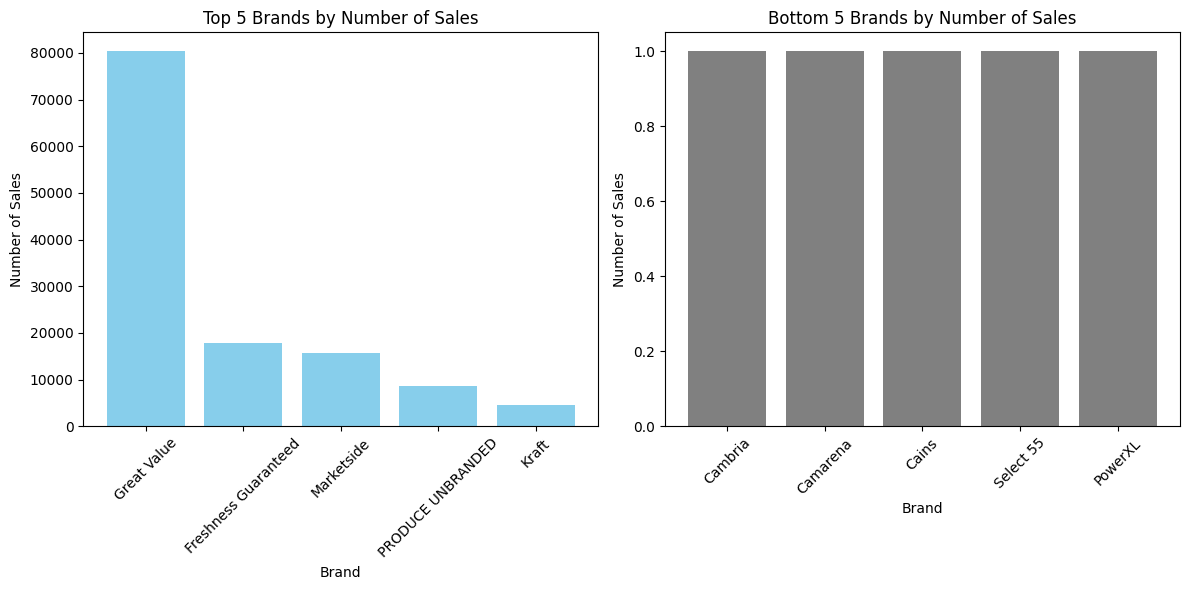

In [18]:
# Group by brand and count the total number of sales and display top and bottom 5 in bar graph
f.top_bottom_5_bar_plot(walmart_df,'brand','Brand','Number of Sales','5 Brands by Number of Sales','topAndBottom5_brands')

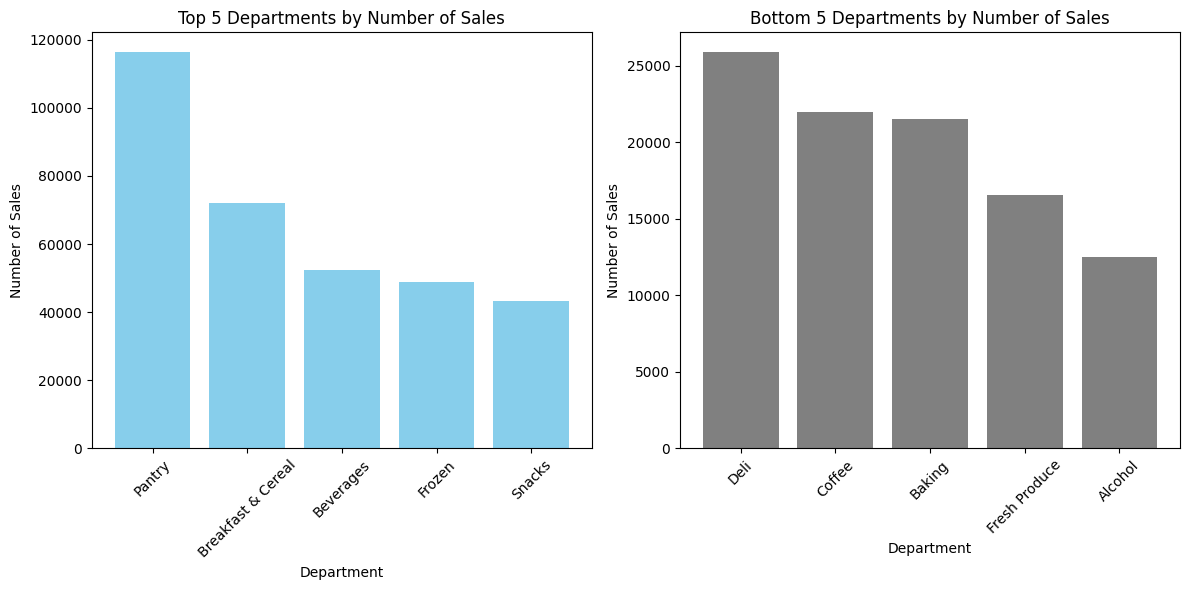

In [19]:
# Group by department and count the number of sales and display top and bottom 5 in bar graph
f.top_bottom_5_bar_plot(walmart_df,'department','Department','Number of Sales','5 Departments by Number of Sales','topAndBottom5_departments_sales')

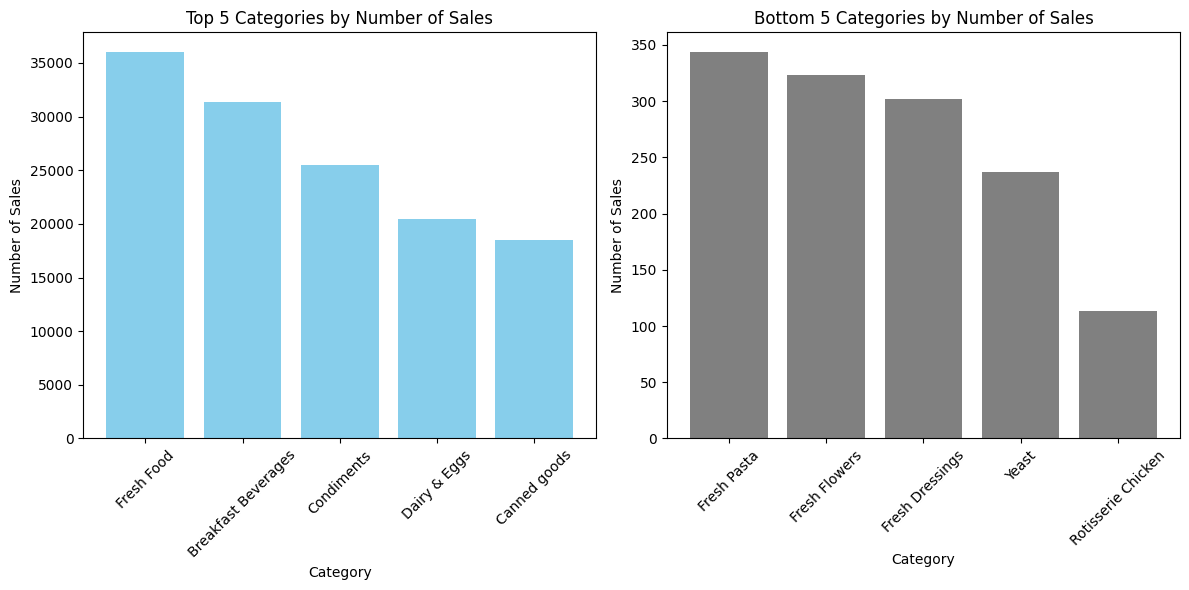

In [20]:
# Group by category and count the number of sales and display top and bottom 5 in bar graph
f.top_bottom_5_bar_plot(walmart_df,'category','Category','Number of Sales','5 Categories by Number of Sales','topAndBottom5_categories_sales')

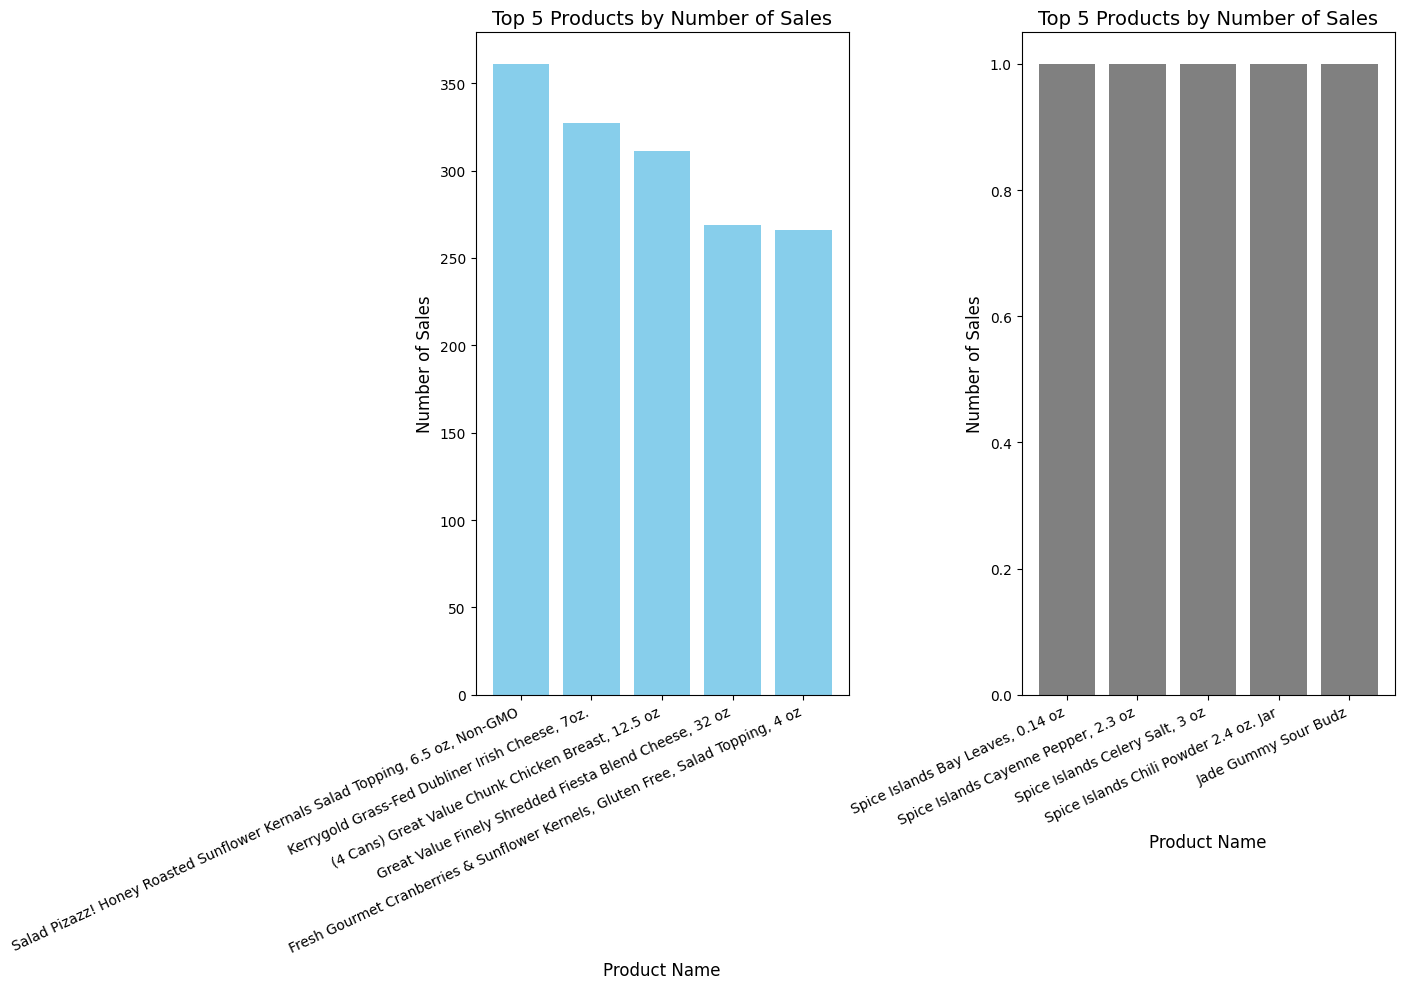

In [21]:
# Group by product_name and count the number of sales and display top and bottom 5 in bar graph
sales_by_product = walmart_df.groupby('product_name').size().sort_values(ascending=False)

# Bar plot for visualization
plt.figure(figsize=(14, 10))

# Plotting top products
plt.subplot(1, 2, 1)
plt.bar(sales_by_product.index[:5], sales_by_product.values[:5], color='skyblue')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Top 5 Products by Number of Sales', fontsize=14)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.yticks

# Plotting bottom products
plt.subplot(1, 2, 2)
plt.bar(sales_by_product.index[-5:], sales_by_product.values[-5:], color='grey')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Top 5 Products by Number of Sales', fontsize=14)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.yticks

plt.tight_layout()
plt.savefig("../images/topAndBottom5_products_sales.png")
plt.show()

In [22]:
# checking if price_retail is same as price_current 
(walmart_df['price_retail'] == walmart_df['price_current']).all()

False

In [23]:
# Create discount column and a discount data frame for further analysis
walmart_df['discount'] = walmart_df['price_retail'] - walmart_df['price_current']
discount_df = walmart_df[walmart_df['discount'] > 0 ]

Top 5 discounted items in categories sold


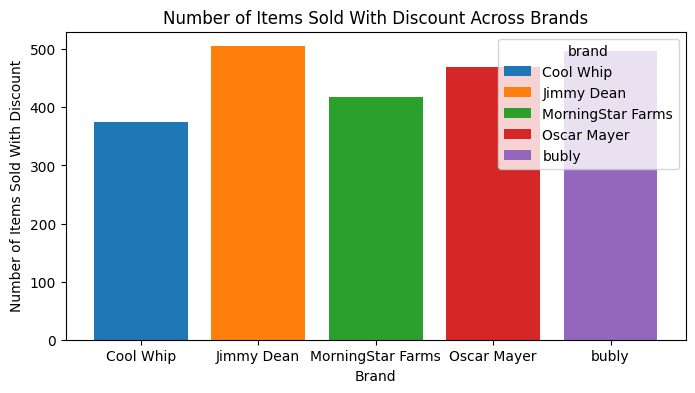

In [24]:
# creating a bar plot for top 5 brand which are on discount
f.print_in_red("Top 5 discounted items in categories sold")
f.top_5_bar_plot(discount_df, 'brand','discount', 'Brand', 'Number of Items Sold With Discount', 'Number of Items Sold With Discount Across Brands','top5_brand_with_discount')

Top 5 discounted items in departments sold


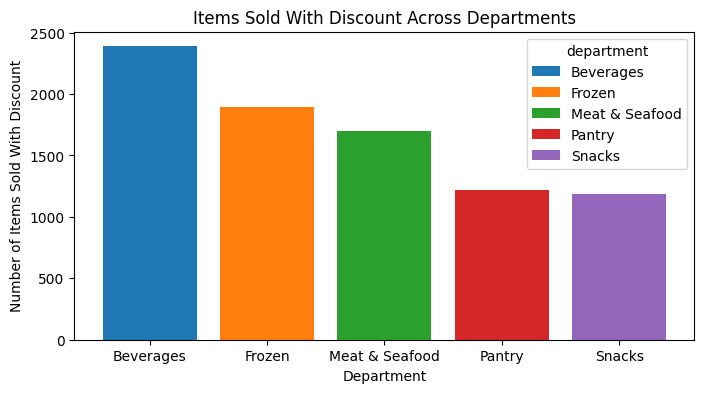

In [25]:
# creating a bar plot for top 5 department which are on discount
f.print_in_red("Top 5 discounted items in departments sold")
f.top_5_bar_plot(discount_df, 'department','discount', 'Department', 'Number of Items Sold With Discount', 'Items Sold With Discount Across Departments','top5_departments_with_discount')

Top 5 discounted items in categories sold


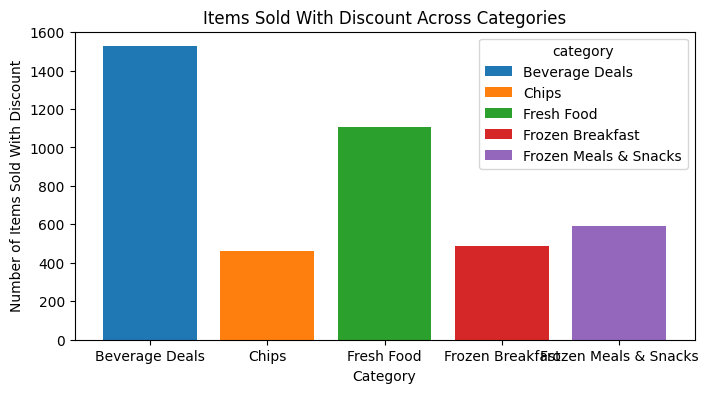

In [26]:
# creating a bar plot for top 5 category which are on discount
f.print_in_red("Top 5 discounted items in categories sold")
f.top_5_bar_plot(discount_df, 'category','discount', 'Category', 'Number of Items Sold With Discount', 'Items Sold With Discount Across Categories', 'top5_categories_with_discount')

Top 5 discounted products sold


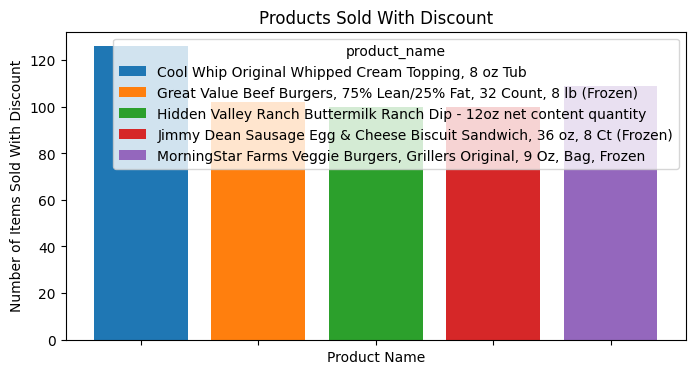

In [27]:
# creating a bar plot for top 5 products which are on discount
f.print_in_red("Top 5 discounted products sold")
f.top_5_bar_plot(discount_df, 'product_name','discount', 'Product Name', 'Number of Items Sold With Discount', 'Products Sold With Discount','top5_products_with_discount')

C:\Users\Lenovo\Desktop\week3_project\notebooks\functions.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_counts['percentage'] = (sales_counts['count'] / total_sales) * 100


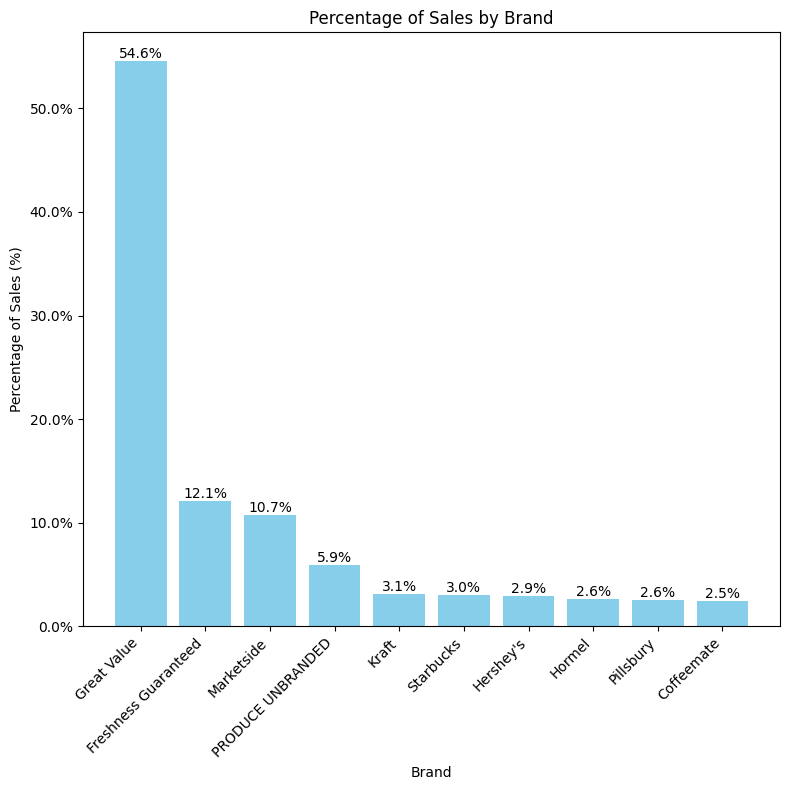

C:\Users\Lenovo\Desktop\week3_project\notebooks\functions.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_counts['percentage'] = (sales_counts['count'] / total_sales) * 100


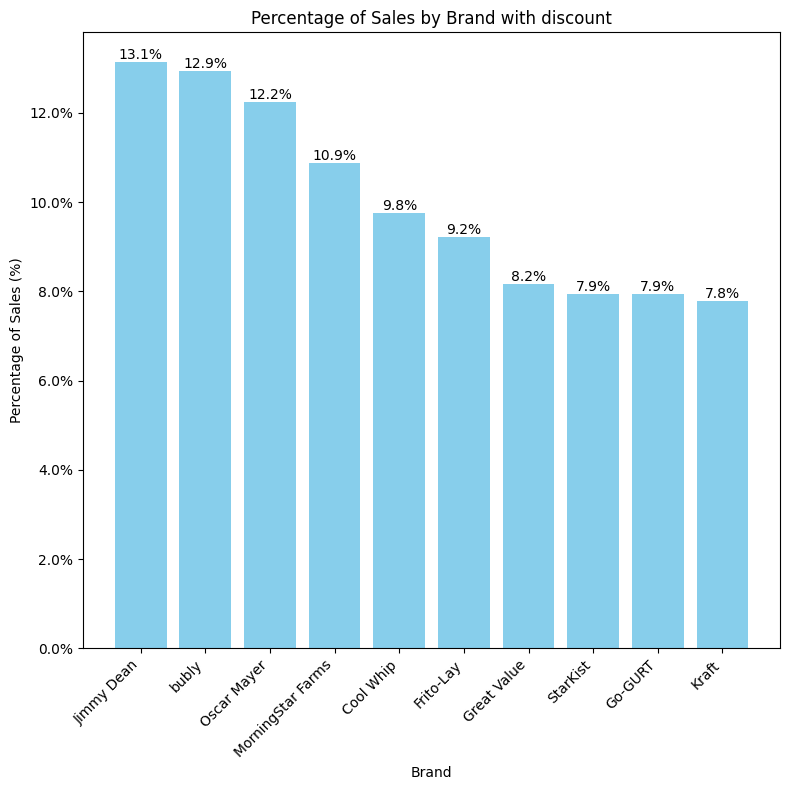

In [28]:
# Create bar chart to show the top 10 brand sold by percentage
f.top_sales_by_percentage_bar_plot(walmart_df, 'brand', 'Brand', 'Percentage of Sales (%)', 'Percentage of Sales by Brand','brand_sales_percentage')
f.top_sales_by_percentage_bar_plot(discount_df, 'brand', 'Brand', 'Percentage of Sales (%)', 'Percentage of Sales by Brand with discount','discount_brand_sales_percentage')

C:\Users\Lenovo\Desktop\week3_project\notebooks\functions.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_counts['percentage'] = (sales_counts['count'] / total_sales) * 100


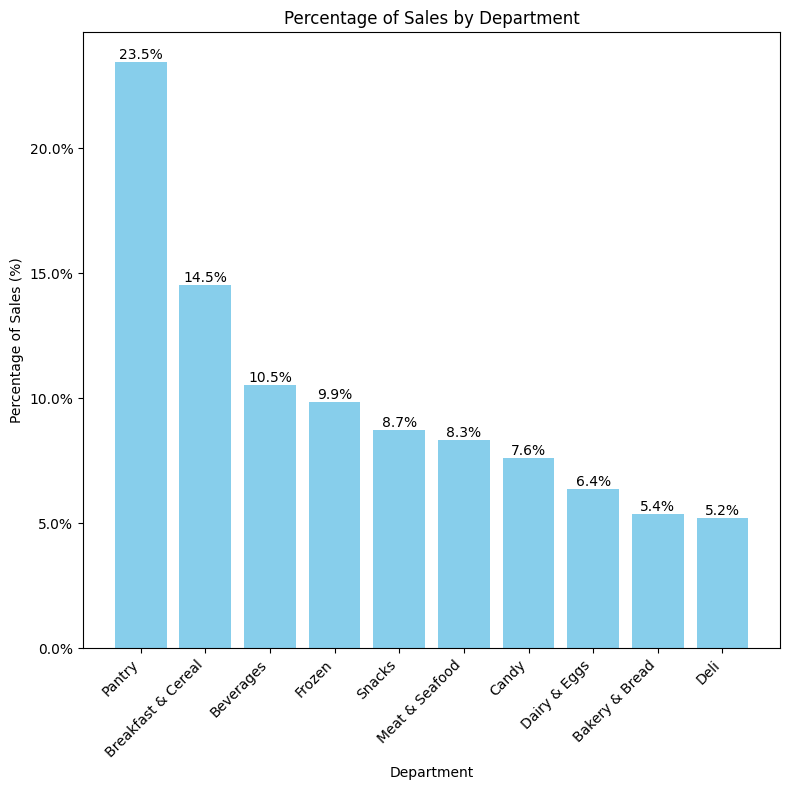

C:\Users\Lenovo\Desktop\week3_project\notebooks\functions.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_counts['percentage'] = (sales_counts['count'] / total_sales) * 100


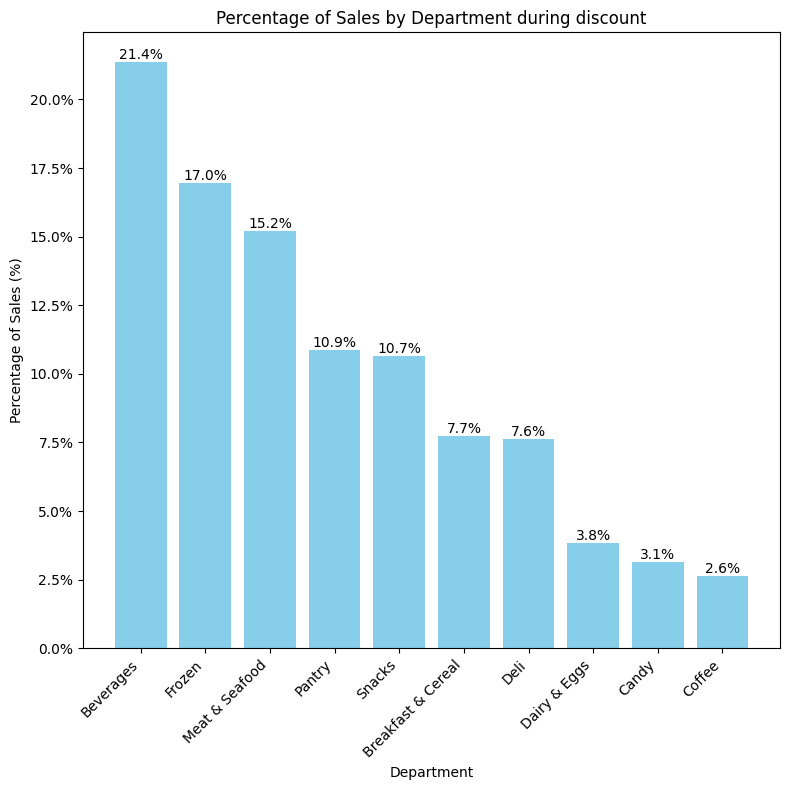

In [29]:
# Create bar chart to show the top 10 department sold by percentage
f.top_sales_by_percentage_bar_plot(walmart_df, 'department', 'Department', 'Percentage of Sales (%)', 'Percentage of Sales by Department','department_sales_percentage')
f.top_sales_by_percentage_bar_plot(discount_df, 'department', 'Department', 'Percentage of Sales (%)', 'Percentage of Sales by Department during discount','discount_department_sales_percentage')

C:\Users\Lenovo\Desktop\week3_project\notebooks\functions.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_counts['percentage'] = (sales_counts['count'] / total_sales) * 100


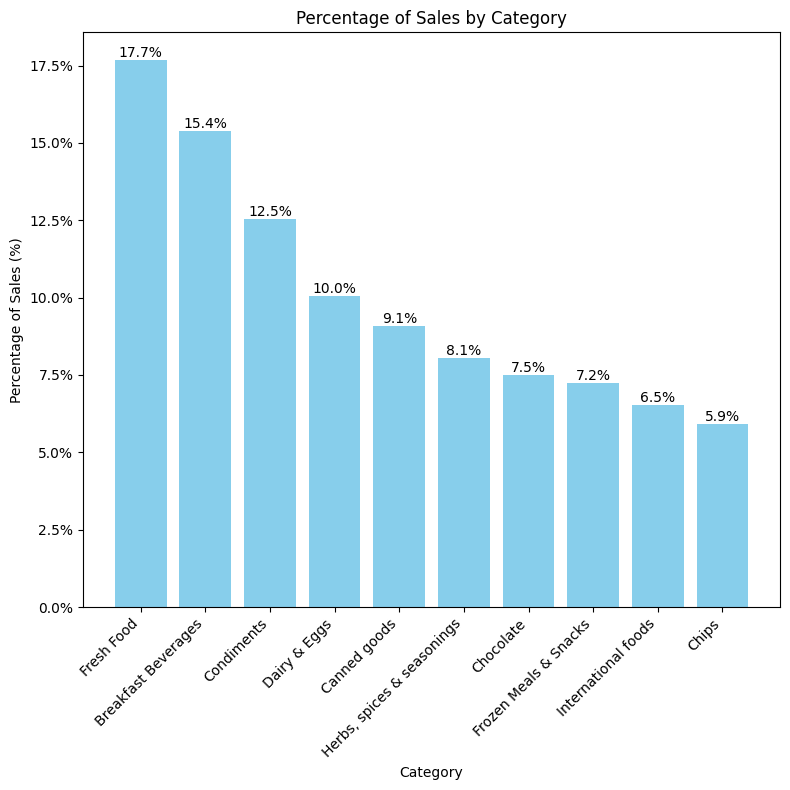

C:\Users\Lenovo\Desktop\week3_project\notebooks\functions.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_counts['percentage'] = (sales_counts['count'] / total_sales) * 100


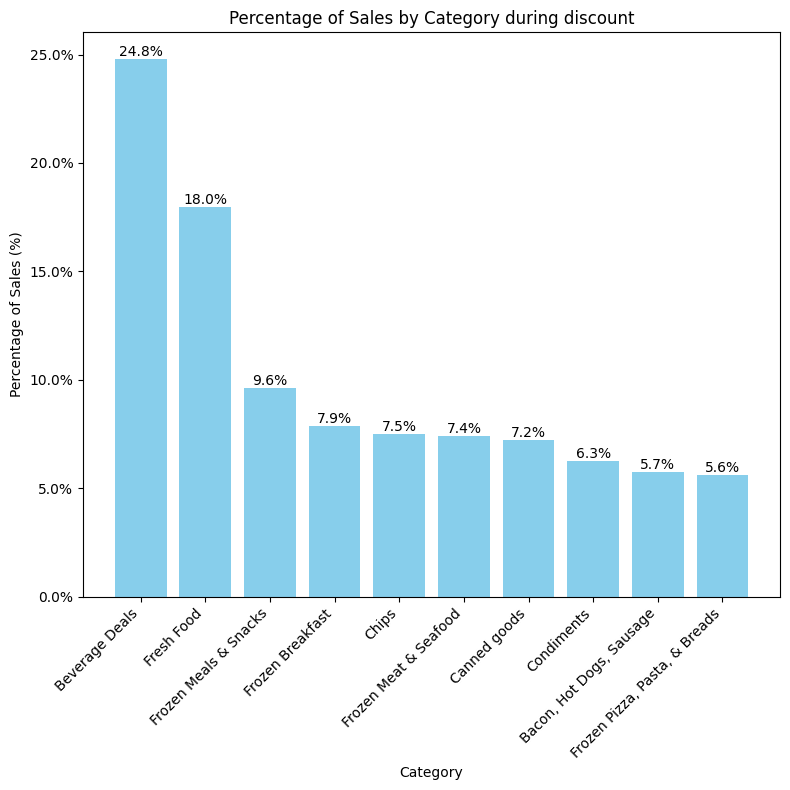

In [30]:
# Create bar chart to show the top 10 categories sold by percentage
f.top_sales_by_percentage_bar_plot(walmart_df, 'category', 'Category', 'Percentage of Sales (%)', 'Percentage of Sales by Category','category_sales_percentage')
f.top_sales_by_percentage_bar_plot(discount_df, 'category', 'Category', 'Percentage of Sales (%)', 'Percentage of Sales by Category during discount','discount_category_sales_percentage')

In [31]:
# Aggregating by price_current column and grouping all the necessary columns to calculate total_revenue
aggregated_data_current = walmart_df.groupby(
    ['brand', 'department', 'category', 'subcategory', 'product_name']
).agg({
    'price_current': ['sum'],
    }).reset_index()

# Renaming columns for better readability
aggregated_data_current.columns = [
    'brand', 'department', 'category', 'subcategory', 'product_name', 'total_revenue']


# Sorting the DataFrame by total revenue in descending order
aggregated_data_current = aggregated_data_current.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)

# Selecting the top 10 revenue
top_sellers_by_revenue = aggregated_data_current.head(10)
# Selecting the bottom 10 revenue
bottom_sellers_by_revenue = aggregated_data_current.tail(10)

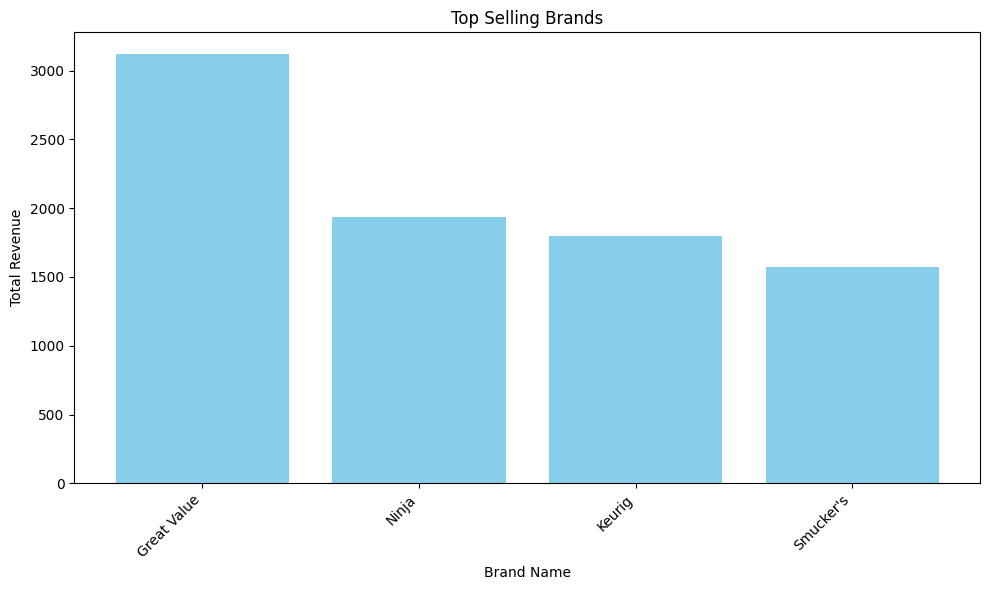

In [32]:
# showing bar chart of highest revenue by brands
f.total_revenue_bar_plot(top_sellers_by_revenue,'brand','total_revenue','Brand Name','Total Revenue','Top Selling Brands','skyblue','Top_Selling_Brands')

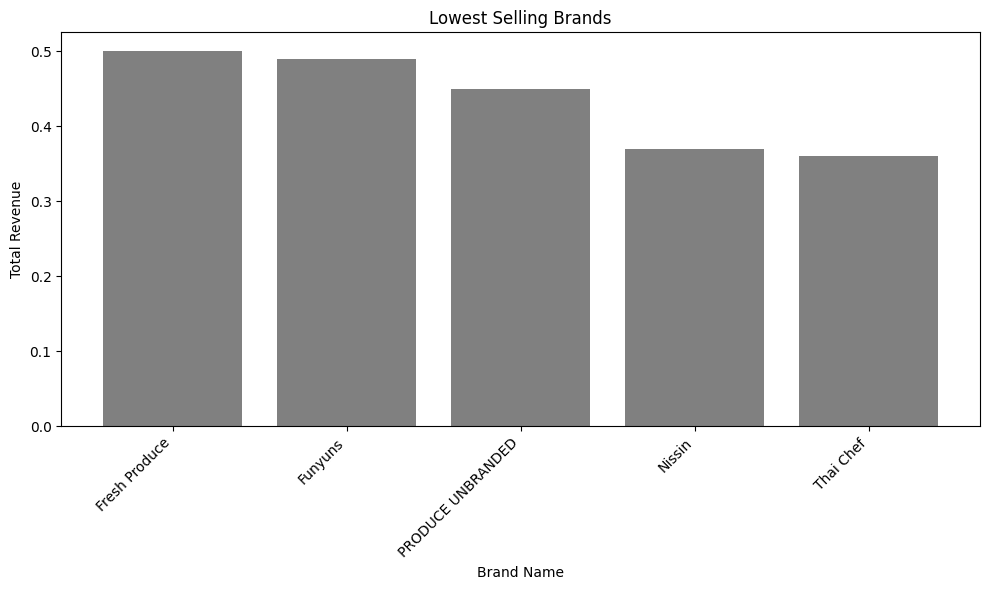

In [33]:
# showing bar chart of lowest revenue by brands
f.total_revenue_bar_plot(bottom_sellers_by_revenue,'brand','total_revenue','Brand Name','Total Revenue','Lowest Selling Brands','grey','Lowest_Selling_Brands')

In [34]:
walmart_df.to_csv(config['data']['cleaned'], index=False)
print("Finished creating clean data set csv file")

Finished creating clean data set csv file
